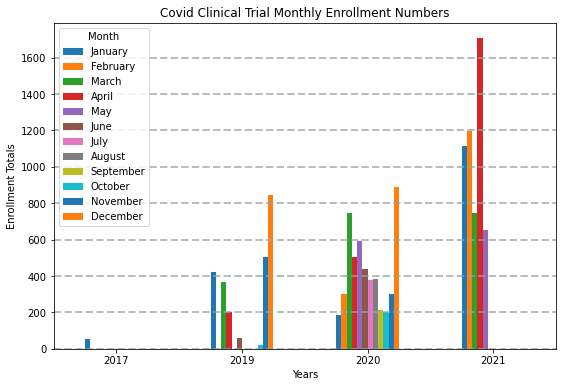

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV (load date data as proper date types)
covid = "~/Desktop/clinical-trial_data.csv"
covid_df = pd.read_csv(covid)
covid_df["Start Date"] = pd.to_datetime(covid_df["Start Date"])

# Sort the DF from oldest to most recent recordings
covid_df.sort_values(by="Start Date", inplace=True)

# Use the column of dates as the DF's index
covid_df.set_index(["Start Date"], inplace=True)

# Remove possible outliers
covid_df = covid_df[
    (covid_df["Enrollment"] > covid_df["Enrollment"].quantile(0.025)) &
    (covid_df["Enrollment"] < covid_df["Enrollment"].quantile(0.975))
]

months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]

# Create a column that has the year of each date recording
covid_df["Year"] = covid_df.index.year

# Create a column that has the month (1-12) of each date recording
covid_df["Month"] = covid_df.index.month

# Map the month integers to their proper names
covid_df["Month"] = covid_df["Month"].apply(
    lambda data: months[data-1]
)
# Create a categorical column so it can be sorted by the order of values in the months list
covid_df["Month"] = pd.Categorical(covid_df["Month"], categories=months)

# Pivot the DF so that there's a column for each month, each row represents a year & the cells have the mean page views 
# for the respective year & month

covid_df_pivot = pd.pivot_table(
    covid_df,
    values="Enrollment",
    index="Year",
    columns="Month",
    aggfunc=np.mean
)

# Plot a bar chart using the DF
ax = covid_df_pivot.plot(kind="bar")

# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()

# Change the plot dimensions (width, height)
fig.set_size_inches(9, 6)

# Change the axes labels
plt.title("Covid Clinical Trial Monthly Enrollment Numbers")
ax.set_xlabel("Years")
plt.xticks(rotation=0,)
ax.set_ylabel("Enrollment Totals")

# Plot gridlines
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)

# Export the plot as a PNG file
fig.savefig("covid_enrollment.png")

In [2]:
Total = covid_df['Enrollment'].sum()
print (Total)

556550


In [3]:
print(f'The most trials recorded happened in the year of 2020.') 
print(f'However, based on 2021 (January-May) data collected so far, these numbers should exceed the previous years enrollment.') 
print(f'The month of April 2021 had the highest enrollment totals. While the second highest month was in February 2021.')

The most trials recorded happened in the year of 2020.
However, based on 2021 (January-May) data collected so far, these numbers should exceed the previous years enrollment.
The month of April 2021 had the highest enrollment totals. While the second highest month was in February 2021.
